# Basketball/TICA: My progress so far

* Learn a bit of Python
* Parsing the data, indentifying problems:
    * Current score N/A
    * Shotclock not consistent or not tracked
    * Missing data for ball (e.g. row 19352)
    * Even for the players, switching columns
* Displaying the data
* Applying TICA to a whole team data set

In [37]:
import numpy as np
import match_data as md
import pyemma.coordinates as coor
import matplotlib.pyplot as plt

%matplotlib inline

# Parsing data

In [ ]:
bball_data = md.BballData("tracking sample 1 q34.xlsx")
#bball_data = md.BballData("toy 1.xlsx")

In [30]:
bball_data.describe()
print(bball_data.game_id, bball_data.num_pts)

       SEASON_ID  MONTH_ID  GAME_CODE          TIME           TEAM  \
count   607962.0  607962.0   607962.0  6.079620e+05  607962.000000   
mean    201501.0       4.0  1570743.0  1.459571e+12       1.999671   
std          0.0       0.0        0.0  1.114814e+06       0.925542   
min     201501.0       4.0  1570743.0  1.459569e+12       1.000000   
25%     201501.0       4.0  1570743.0  1.459570e+12       1.000000   
50%     201501.0       4.0  1570743.0  1.459571e+12       2.000000   
75%     201501.0       4.0  1570743.0  1.459572e+12       3.000000   
max     201501.0       4.0  1570743.0  1.459573e+12       4.000000   

       UNIFORM_NUMBER     X_POSITION     Y_POSITION     Z_POSITION  \
count   607962.000000  607962.000000  607962.000000  607962.000000   
mean        21.176197      48.834178      25.154299       0.313665   
std         21.052185      29.651348      14.002750       1.377562   
min         -1.000000      -5.880260      -2.359720       0.000000   
25%          4.0000

C:\Users\Johannes\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


In [31]:
traj = bball_data.trajectory(player_id=None, pl_id_type='data_id', team_id=None, ball=True, distinguish_teams=False, quarters=None, cur_quarter=None, off_status=False, shot_clock=False, game_clock=False)
traj

array([[ 85.11786,  11.43795,  87.33399, ...,  15.44333,   0.37981,
          6.12591],
       [ 85.09834,  11.48467,  87.33403, ...,  15.44293,   0.23144,
          5.97187],
       [ 85.08818,  11.54257,  87.34377, ...,  15.45154,   0.09734,
          5.80231],
       ..., 
       [ 16.07853,  20.4328 ,   8.07651, ...,  24.9153 ,  12.52637,
         21.89529],
       [ 16.17976,  20.33268,   8.04927, ...,  24.94808,  12.55787,
         21.73549],
       [ 16.272  ,  20.22621,   8.01558, ...,  24.98951,  12.59408,
         21.58432]])

# Displaying data

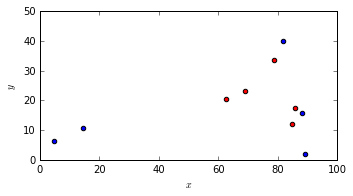

In [34]:
bball_data.show(50)

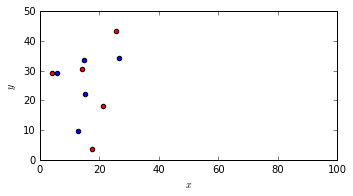

In [35]:
bball_data.play(0, 1000)

# TICA

In [39]:
tica_obj = coor.tica(traj, lag=40, var_cutoff=0.95, kinetic_map=True)
proj_data = tica_obj.get_output()[0]
print('TICA dimension ', tica_obj.dimension())
print('Eigenvalues:', tica_obj.eigenvalues)

TICA dimension  19
Eigenvalues: [ 0.9432728   0.92376657  0.90969813  0.90415413  0.8943761   0.88144609
  0.87685     0.87045257  0.86472767  0.85761016  0.85082162  0.84337501
  0.83911004  0.82850059  0.809312    0.80358796  0.79341801  0.78037464
  0.75481226  0.6978603 ]


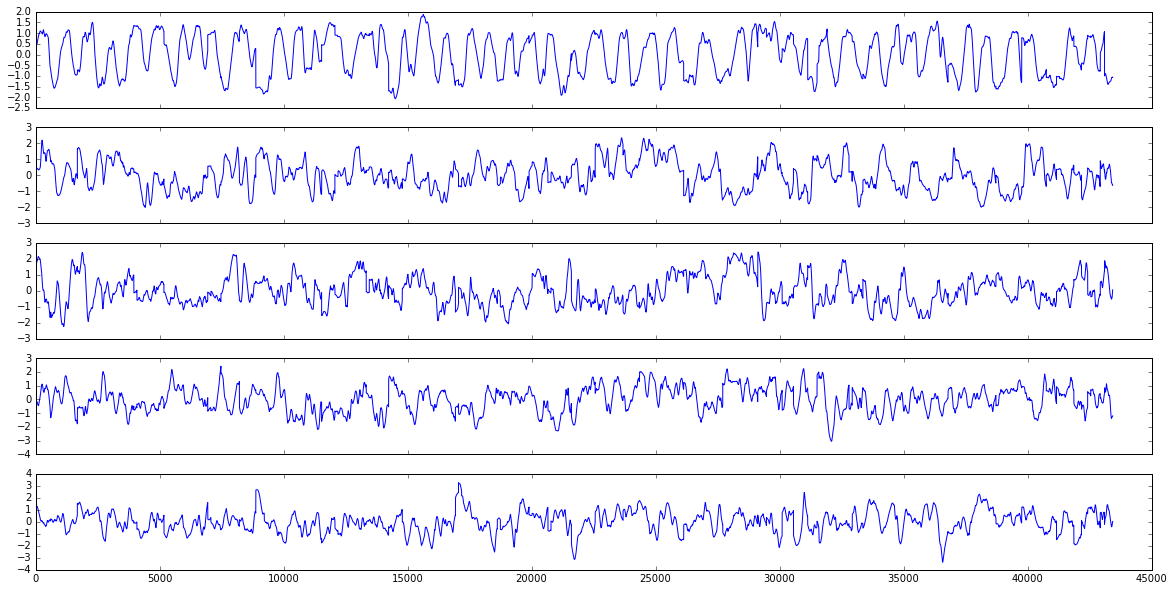

In [40]:
num_plots = 5
x = range(traj.shape[0])
f, ax = plt.subplots(num_plots, sharex=True, figsize=(20,num_plots*2))
for i in range(num_plots):
    ax[i].plot(x, proj_data[x,i])

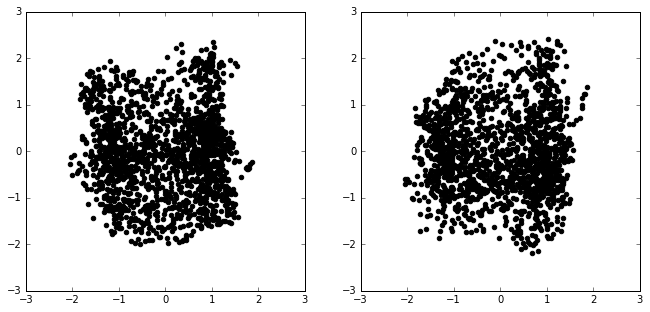

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(11,5))
for i, ax in enumerate(axes.flat):
    ax.scatter(proj_data[::25,0], proj_data[::25,i+1], c='black')